In [361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split

In [305]:
data = pd.read_csv(r"../dataset/dataset_phishing.csv")
data

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


In [306]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [307]:
data.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [308]:
for cols in data.columns:
    if len(data[cols].unique()) < 2:
        print(f"{cols} : {data[cols].unique()}")

nb_or : [0]
ratio_nullHyperlinks : [0]
ratio_intRedirection : [0]
ratio_intErrors : [0]
submit_email : [0]
sfh : [0]


In [309]:

for cols in data.columns:
    if len(data[cols].unique()) == 2:
        print(f"{cols} : {data[cols].unique()}")

ip : [0 1]
nb_tilde : [0 1]
nb_star : [0 1]
nb_dslash : [0 1]
https_token : [1 0]
punycode : [0 1]
port : [0 1]
tld_in_path : [0 1]
tld_in_subdomain : [0 1]
abnormal_subdomain : [0 1]
prefix_suffix : [0 1]
random_domain : [0 1]
shortening_service : [0 1]
path_extension : [0 1]
nb_external_redirection : [0 1]
domain_in_brand : [0 1]
brand_in_subdomain : [0 1]
brand_in_path : [0 1]
suspecious_tld : [0 1]
login_form : [0 1]
external_favicon : [0 1]
iframe : [0 1]
popup_window : [0 1]
onmouseover : [0 1]
right_clic : [0 1]
empty_title : [0 1]
domain_in_title : [0 1]
domain_with_copyright : [1 0]
whois_registered_domain : [0 1]
dns_record : [1 0]
google_index : [1 0]
status : ['legitimate' 'phishing']


In [310]:
for cols in data.columns:
    if len(data[cols].unique()) > 2:
        print(f"{cols}")

url
length_url
length_hostname
nb_dots
nb_hyphens
nb_at
nb_qm
nb_and
nb_eq
nb_underscore
nb_percent
nb_slash
nb_colon
nb_comma
nb_semicolumn
nb_dollar
nb_space
nb_www
nb_com
http_in_path
ratio_digits_url
ratio_digits_host
nb_subdomains
nb_redirection
length_words_raw
char_repeat
shortest_words_raw
shortest_word_host
shortest_word_path
longest_words_raw
longest_word_host
longest_word_path
avg_words_raw
avg_word_host
avg_word_path
phish_hints
statistical_report
nb_hyperlinks
ratio_intHyperlinks
ratio_extHyperlinks
nb_extCSS
ratio_extRedirection
ratio_extErrors
links_in_tags
ratio_intMedia
ratio_extMedia
safe_anchor
domain_registration_length
domain_age
web_traffic
page_rank


In [311]:
# 26,27,28,35,54,37-50,51-56,58-73,75-83,85,87

data = data.drop(data.iloc[:,[0,9,26,27,28,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,75,76,
                  77,78,79,80,81,82,83,85,87]],axis = 1)

In [312]:
data["http_in_path"].unique()

array([0, 1, 4, 3, 2], dtype=int64)

In [313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   length_url          11430 non-null  int64 
 1   length_hostname     11430 non-null  int64 
 2   ip                  11430 non-null  int64 
 3   nb_dots             11430 non-null  int64 
 4   nb_hyphens          11430 non-null  int64 
 5   nb_at               11430 non-null  int64 
 6   nb_qm               11430 non-null  int64 
 7   nb_and              11430 non-null  int64 
 8   nb_eq               11430 non-null  int64 
 9   nb_underscore       11430 non-null  int64 
 10  nb_tilde            11430 non-null  int64 
 11  nb_percent          11430 non-null  int64 
 12  nb_slash            11430 non-null  int64 
 13  nb_star             11430 non-null  int64 
 14  nb_colon            11430 non-null  int64 
 15  nb_comma            11430 non-null  int64 
 16  nb_semicolumn       11

In [314]:
for col in data.columns:
    if len(data[col].unique()) < 2:
        print(f"lesser than 2 {col}")
    else:
        print(f"greater than 2 {col}")

greater than 2 length_url
greater than 2 length_hostname
greater than 2 ip
greater than 2 nb_dots
greater than 2 nb_hyphens
greater than 2 nb_at
greater than 2 nb_qm
greater than 2 nb_and
greater than 2 nb_eq
greater than 2 nb_underscore
greater than 2 nb_tilde
greater than 2 nb_percent
greater than 2 nb_slash
greater than 2 nb_star
greater than 2 nb_colon
greater than 2 nb_comma
greater than 2 nb_semicolumn
greater than 2 nb_dollar
greater than 2 nb_space
greater than 2 nb_www
greater than 2 nb_com
greater than 2 nb_dslash
greater than 2 http_in_path
greater than 2 https_token
greater than 2 port
greater than 2 tld_in_path
greater than 2 tld_in_subdomain
greater than 2 abnormal_subdomain
greater than 2 nb_subdomains
greater than 2 nb_hyperlinks
greater than 2 popup_window
greater than 2 web_traffic
greater than 2 google_index
greater than 2 status


In [315]:
ordinal_enc = OrdinalEncoder()
data["status"] = ordinal_enc.fit_transform(data["status"].values.reshape(-1,1))
data["status"]

0        0.0
1        1.0
2        1.0
3        0.0
4        0.0
        ... 
11425    0.0
11426    1.0
11427    0.0
11428    0.0
11429    1.0
Name: status, Length: 11430, dtype: float64

In [316]:
#data[data["https_token"] == 0]

# Visualising

In [317]:
#30,31
def counting(var,col):
    return sns.countplot(x = var,data = data, hue = col)
    

<AxesSubplot:xlabel='status', ylabel='count'>

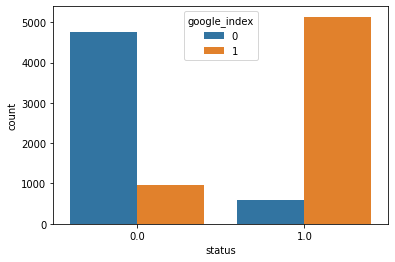

In [318]:
counting("status","google_index")

<AxesSubplot:xlabel='status', ylabel='count'>

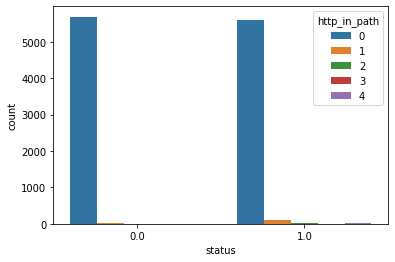

In [319]:
counting("status","http_in_path")

<AxesSubplot:xlabel='status', ylabel='count'>

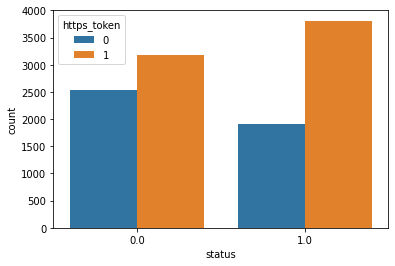

In [320]:
counting("status","https_token")

<AxesSubplot:xlabel='status', ylabel='count'>

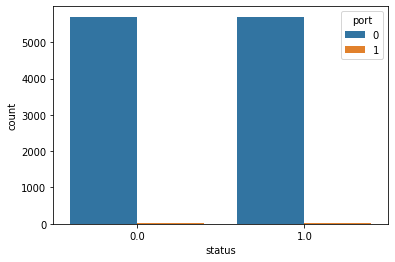

In [321]:
counting("status","port")

<AxesSubplot:xlabel='status', ylabel='count'>

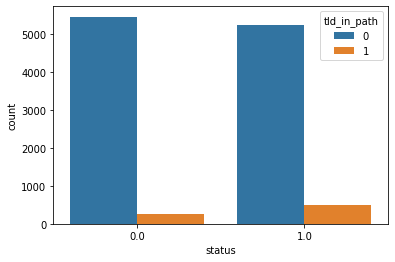

In [322]:
counting("status","tld_in_path")

<AxesSubplot:xlabel='status', ylabel='count'>

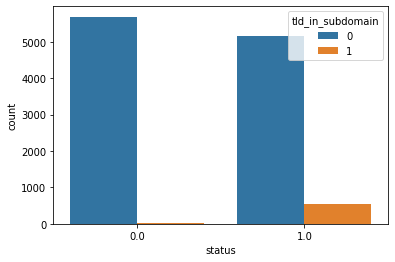

In [323]:
counting("status","tld_in_subdomain")

<AxesSubplot:xlabel='status', ylabel='count'>

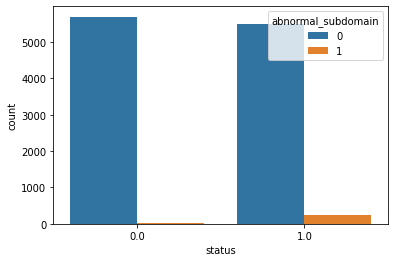

In [324]:
counting("status","abnormal_subdomain")

<AxesSubplot:xlabel='status', ylabel='count'>

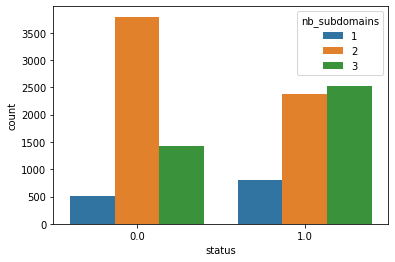

In [325]:
counting("status","nb_subdomains")       

<AxesSubplot:xlabel='status', ylabel='count'>

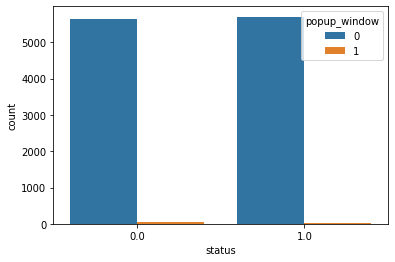

In [326]:
counting("status","popup_window")

In [327]:
data = data.drop(data.iloc[:,[25,26]],axis = 1)

array([[<AxesSubplot:xlabel='http_in_path', ylabel='http_in_path'>,
        <AxesSubplot:xlabel='nb_subdomains', ylabel='http_in_path'>,
        <AxesSubplot:xlabel='web_traffic', ylabel='http_in_path'>,
        <AxesSubplot:xlabel='google_index', ylabel='http_in_path'>,
        <AxesSubplot:xlabel='status', ylabel='http_in_path'>],
       [<AxesSubplot:xlabel='http_in_path', ylabel='nb_subdomains'>,
        <AxesSubplot:xlabel='nb_subdomains', ylabel='nb_subdomains'>,
        <AxesSubplot:xlabel='web_traffic', ylabel='nb_subdomains'>,
        <AxesSubplot:xlabel='google_index', ylabel='nb_subdomains'>,
        <AxesSubplot:xlabel='status', ylabel='nb_subdomains'>],
       [<AxesSubplot:xlabel='http_in_path', ylabel='web_traffic'>,
        <AxesSubplot:xlabel='nb_subdomains', ylabel='web_traffic'>,
        <AxesSubplot:xlabel='web_traffic', ylabel='web_traffic'>,
        <AxesSubplot:xlabel='google_index', ylabel='web_traffic'>,
        <AxesSubplot:xlabel='status', ylabel='web_traffic

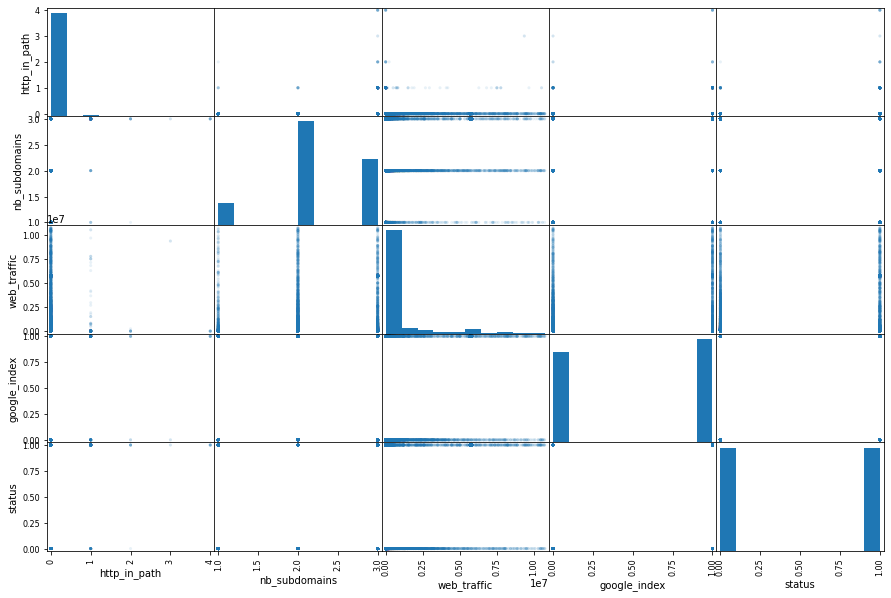

In [328]:
attrs = ["http_in_path","nb_subdomains","web_traffic","google_index","status"]
scatter_matrix(data[attrs],figsize = (15,10),alpha = 0.1)

<AxesSubplot:>

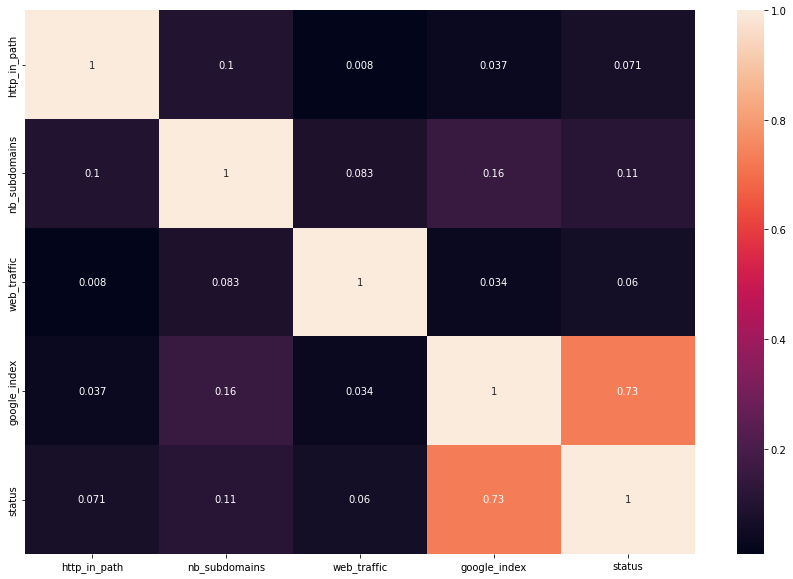

In [329]:
figure,axes = plt.subplots(figsize = (15,10))
sns.heatmap(data[attrs].corr(),annot = True,ax = axes)

In [330]:
data["nb_www"].unique()

array([1, 0, 2], dtype=int64)

In [331]:
cor_mat = data.corr()
cor_mat["status"]

length_url            0.248580
length_hostname       0.238322
ip                    0.321698
nb_dots               0.207029
nb_hyphens           -0.100107
nb_at                 0.142915
nb_qm                 0.294319
nb_and                0.170546
nb_eq                 0.233386
nb_underscore         0.038091
nb_tilde              0.030142
nb_percent            0.028101
nb_slash              0.242270
nb_star               0.026465
nb_colon              0.092835
nb_comma              0.011865
nb_semicolumn         0.103554
nb_dollar             0.024962
nb_space             -0.004193
nb_www               -0.443468
nb_com                0.156284
nb_dslash             0.072602
http_in_path          0.070776
https_token           0.114669
port                  0.009011
abnormal_subdomain    0.128160
nb_subdomains         0.112891
nb_hyperlinks        -0.342628
popup_window         -0.057602
web_traffic           0.060388
google_index          0.731171
status                1.000000
Name: st

<AxesSubplot:>

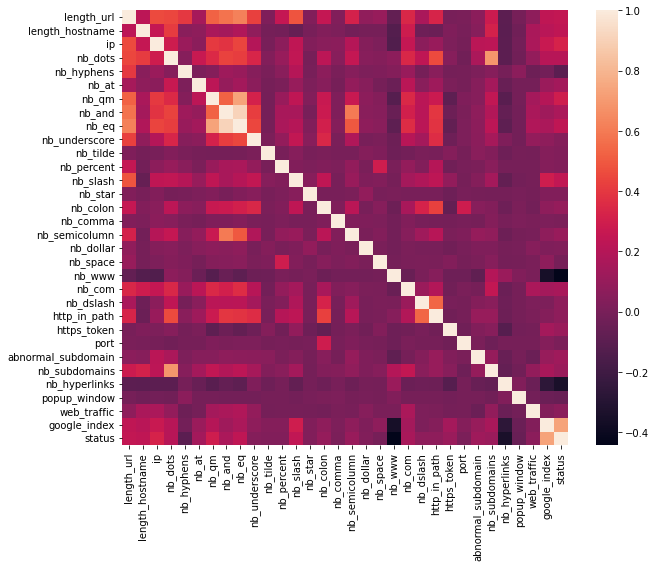

In [332]:
plt.figure(figsize = (10,8))
sns.heatmap(cor_mat)


<AxesSubplot:xlabel='status', ylabel='count'>

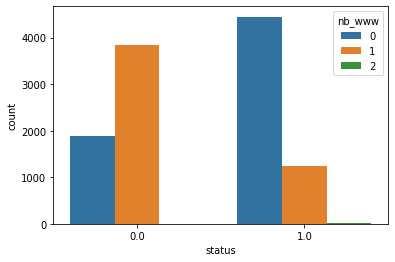

In [333]:
counting("status","nb_www")

<AxesSubplot:xlabel='nb_www', ylabel='count'>

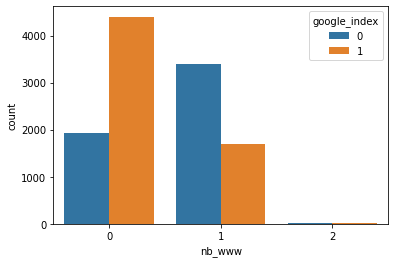

In [334]:
counting("nb_www","google_index")

# Cleaning and splitting train and test set

In [349]:
data["google_index_cut"] = pd.cut(data["google_index"],
                             bins = [-1,0,1]).astype(str)

<AxesSubplot:>

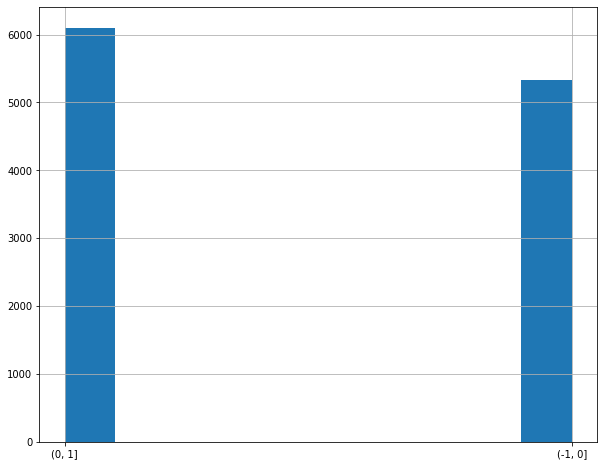

In [350]:
plt.figure(figsize = (10,8))
data["google_index_cut"].hist()

In [359]:
split = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2,random_state = 42)
for train_index,test_index in split.split(data,data["google_index_cut"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]


In [360]:
strat_train_set["google_index_cut"].value_counts() / len(strat_train_set)

(0, 1]     0.533902
(-1, 0]    0.466098
Name: google_index_cut, dtype: float64

In [363]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("google_index_cut", axis=1, inplace=True)

In [367]:
train_set,test_set = train_test_split(data,test_size = 0.2,random_state = 100)

In [368]:
train_set["google_index"].value_counts() / len(train_set)

1    0.532918
0    0.467082
Name: google_index, dtype: float64